In [1]:
#https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam_support_info.csv

#Failide lugemiseks Colabis
#import os
#from google.colab import drive
colab = False
if colab: 
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Colab Notebooks/data/csvs')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import copy
from sklearn.metrics import mean_squared_error, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
steamdata = pd.read_csv('steam.csv')

In [4]:
steamdata.sort_values('positive_ratings', ascending=False).head(50)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
1467,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,890,10000000-20000000,7.49
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00
1120,105600,Terraria,2011-05-16,1,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,1840,5000000-10000000,6.99
21,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19


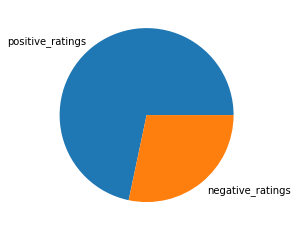

In [5]:
# visualize average rating when a game is either single or multiplayer
multirating = [0,0]
singlerating = [0,0]
bothrating = [0,0]
for index, row in steamdata.iterrows():
    if "Multi-player" in row['categories'] and "Single-player" in row['categories']:
      # += one entry
      bothrating[0] += 1
      # += percent of positive ratings on entry
      bothrating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Multi-player" in row['categories']:
      multirating[0] += 1
      multirating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])
    elif "Single-player" in row['categories']:
      singlerating[0] += 1
      singlerating[1] += row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings'])

#calculate percentage
singletemp = [singlerating[1] / singlerating[0], 1 - singlerating[1] / singlerating[0]]
multitemp = [multirating[1] / multirating[0], 1 - multirating[1] / multirating[0]]
bothtemp = [bothrating[1] / bothrating[0], 1 - bothrating[1] / bothrating[0]]

labels = ["positive_ratings", "negative_ratings"]
#plot bothrating piechart
plt.pie(bothtemp, labels = labels)
plt.show()

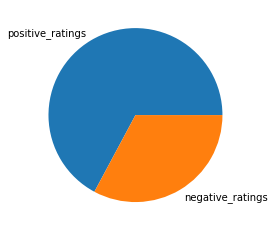

In [6]:
#multiplayer games ratings
plt.pie(multitemp, labels = labels)
plt.show()

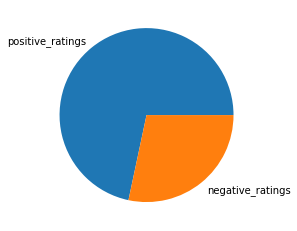

In [7]:
#singleplayer games rating
plt.pie(singletemp, labels = labels)
plt.show()

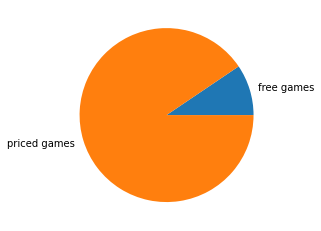

In [8]:
#how many games are free
total = len(steamdata)
free = 0
for index, row in steamdata.iterrows():
  if row['price'] == 0:
    free += 1
percentag = [free/total, 1 - free/total]
plt.pie(percentag, labels = ['free games', 'priced games'])
plt.show()

achievements              9821
average_playtime           0.0
name                LOGistICAL
Name: 12604, dtype: object
achievements                                  0
average_playtime                        3177.08
name                The Abbey of Crime Extensum
Name: 9201, dtype: object


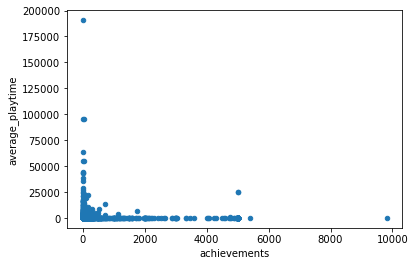

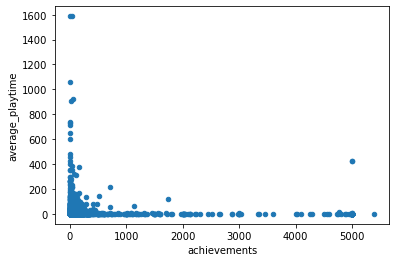

In [9]:
ax1 = steamdata.plot.scatter(x='achievements',y='average_playtime')
achdf = pd.DataFrame()
achdf['achievements'] = steamdata['achievements']
achdf = achdf.join(steamdata['average_playtime'])
achdf['average_playtime'] = achdf['average_playtime'].div(60).round(2)
achdf = achdf.join(steamdata['name'])
print(achdf.loc[achdf['achievements'].idxmax()])
print(achdf.loc[achdf['average_playtime'].idxmax()])
achdf = achdf.drop(achdf['achievements'].idxmax())
achdf = achdf.drop(achdf['average_playtime'].idxmax())
ax2 = achdf.plot.scatter(x='achievements',y='average_playtime')

In [10]:
modeldf = steamdata['steamspy_tags'].str.get_dummies(';')
modeldf = modeldf.join(steamdata['achievements'])
modeldf = modeldf.join(steamdata['average_playtime'])
modeldf = modeldf.join(steamdata['name'])
modeldf = sklearn.utils.shuffle(modeldf, random_state=40)

# Mille põhjal ennustada
tunnused = []
for col in modeldf.columns:
  tunnused.append(col)
tunnused.remove('average_playtime')
tunnused.remove('name')
# Mida ennustada
ennustatav = 'average_playtime'

train, test = train_test_split(modeldf)
X_train = train[tunnused]
y_train = train[ennustatav]

X_test = test[tunnused]
y_test = test[ennustatav]

from sklearn.tree import DecisionTreeClassifier

mudel = DecisionTreeClassifier()
mudel.fit(X_train, y_train)
y_pred = mudel.predict(X_train)
print("Täpsus treeninghulgal:",accuracy_score(y_train,y_pred))

y_pred = mudel.predict(X_test)

Täpsus treeninghulgal: 0.8991923569388358


In [11]:
print("õige\tennustatud")
print()
for paar in list(zip(y_test,y_pred, test['name'])):
    print(paar[0],"\t",paar[1], "\t", paar[2])
print("Täpsus testhulgal:",accuracy_score(y_test,y_pred))

õige	ennustatud

263 	 0 	 Doodle Kingdom
154 	 148 	 Labyronia RPG 2
0 	 0 	 Zwei: The Ilvard Insurrection
0 	 0 	 Escape From Space Shredder
253 	 47 	 PIGMENTUM
0 	 0 	 Hidden Expedition: The Fountain of Youth Collector's Edition
0 	 0 	 Monster Pub
19 	 0 	 Rytmik Ultimate
0 	 0 	 Elements: Epic Heroes
0 	 0 	 Heaven's Vault
0 	 239 	 Deported 2: Build That Wall
0 	 0 	 Meow Go
139 	 0 	 Epigenesis
5 	 329 	 Hustle Cat
96 	 0 	 Alien Breed 2: Assault
0 	 54 	 Battle Fantasia -Revised Edition-
0 	 0 	 Through the Mirror
0 	 0 	 Barbearian
0 	 0 	 Margonem
0 	 0 	 Close the Window!
406 	 0 	 Crisis in the Kremlin
0 	 0 	 Roller Coaster Rampage
0 	 0 	 モデルDEファイト(Model DE Fight)
0 	 51 	 Frontier
3151 	 1587 	 Assassin's Creed® Odyssey
0 	 0 	 Front Wars
306 	 284 	 9 Clues: The Secret of Serpent Creek
0 	 0 	 TRE HUN: Unity-Chan x Action
0 	 58 	 Walden, a game
0 	 0 	 Yuzi Lims: anime runner
0 	 0 	 Ghosting Gun S
0 	 0 	 Trivia Vault: Hockey Trivia
0 	 0 	 Visitors: Marine Invasion


2 	 557 	 Orake 2D MMORPG
0 	 0 	 One Sole Purpose
414 	 9 	 Iron Sky: Invasion
0 	 0 	 iHUGU
73 	 0 	 Sportsfriends
0 	 0 	 PixelRPG
0 	 0 	 Tanker
0 	 0 	 Late'O'Clock
0 	 0 	 Unroaded
67 	 185 	 Breach & Clear
0 	 0 	 Shiny The Firefly
0 	 0 	 Raining blocks
30 	 0 	 Marie's Room
171 	 121 	 City Car Driving
0 	 0 	 Ice Cream Factory
266 	 0 	 Ittle Dew
0 	 0 	 Beyond Flesh and Blood
0 	 0 	 Illville: Return instructions. Act 1
0 	 0 	 Command: Chains of War
0 	 0 	 Sword of the Guardian
0 	 0 	 Clans
0 	 0 	 Nancy Drew®: Trail of the Twister
0 	 0 	 Baezult 2
0 	 0 	 Gun Brothers
0 	 0 	 Paladin
1164 	 0 	 Farming Simulator 19
0 	 0 	 Neo Angle
0 	 0 	 Highborn
951 	 0 	 Legend of Grimrock 2
0 	 0 	 Retro Rocket Robot
0 	 0 	 kicker
0 	 0 	 R-COIL
0 	 0 	 Volatile Triangle
0 	 0 	 Smash team
120 	 0 	 The Beginner's Guide
519 	 2417 	 Just Cause 2
0 	 0 	 高考工厂模拟(Crazy School Simulator)
0 	 0 	 My Island
0 	 0 	 Voice of Pripyat
0 	 0 	 Echo Tokyo: An Intro
0 	 0 	 Pixel Space
0 	 0

0 	 0 	 Simple Story - Alex
0 	 0 	 Baseball Riot
293 	 0 	 Three Digits
260 	 0 	 Castle of no Escape 2
0 	 0 	 Abha "Light on the Path"
0 	 0 	 Adventure Boy Cheapskate DX
0 	 0 	 VR Theme Park Rides
0 	 0 	 Light It ~ てらし鬼 ~
0 	 0 	 Revolution Under Siege Gold
28897 	 645 	 FINAL FANTASY XIV Online
0 	 0 	 Dinosaurus Life VR
0 	 0 	 The Labyrinth
167 	 0 	 Lost in Paradise
0 	 0 	 Marlene Betwixt
291 	 0 	 Tropico 3
0 	 0 	 Journey: Benjamin's Adventures
0 	 0 	 Dr. Schplot's Nanobots
0 	 0 	 Moot District
0 	 0 	 Bug Invaders
3 	 0 	 Iron Knight
0 	 0 	 Nirvana Pilot Yume
0 	 0 	 Captain Backwater
0 	 0 	 Blasted Fortress
0 	 0 	 TankCraft
0 	 0 	 Toki Time Trial
0 	 0 	 Atlantic Fleet
0 	 0 	 Red points
0 	 225 	 RiftStar Raiders
0 	 0 	 Ezy
37 	 1 	 Outrunner 2
81 	 0 	 Carrier Command: Gaea Mission
194 	 0 	 Racer 8
248 	 0 	 Wolf Simulator
335 	 0 	 Hyperdimension Neptunia U: Action Unleashed
0 	 0 	 Jobous the alien R
0 	 0 	 Nimbatus - The Space Drone Constructor
0 	 0 	 Anci

0 	 0 	 Keep Balance VR
0 	 0 	 地铁：恐怖末班车
1336 	 0 	 Romance of the Three Kingdoms 11 with Power Up Kit / 三國志11 with パワーアップキット
0 	 0 	 Apocalipsis
0 	 0 	 Daydream Blue
0 	 299 	 Skelly Selest
0 	 0 	 Devious
0 	 0 	 Little Cells
141 	 0 	 STAR WARS™ Jedi Knight: Dark Forces II
509 	 0 	 GRAV
0 	 0 	 MEMENTO
0 	 0 	 The Contact
0 	 0 	 iterform
218 	 0 	 Rescue Lucy
0 	 0 	 Realms of Arkania 2 - Star Trail Classic
121 	 382 	 Emily is Away
0 	 0 	 Rabbit: Jigsaw Puzzles
0 	 0 	 Disassembly Line
55 	 0 	 Tales of Escape
0 	 0 	 No70: Eye of Basir
0 	 0 	 Dig 4 Destruction
0 	 0 	 Surface: The Pantheon Collector's Edition
0 	 0 	 Slymes
0 	 0 	 Zissi's Island
0 	 0 	 Victory At Sea
244 	 0 	 Iron Impact
0 	 0 	 SpedV
0 	 0 	 Drift Stunt Racing 2019
0 	 121 	 Masked Forces 2: Mystic Demons
0 	 0 	 Dark Nebula VR
239 	 0 	 King's Guard TD
0 	 0 	 Necroball
0 	 0 	 Planet of the Eyes
233 	 0 	 The Ship: Murder Party
13 	 0 	 Stargunner
0 	 0 	 Seven Kingdoms 2 HD
35 	 0 	 Space Empires V
174

0 	 0 	 PRiO
0 	 0 	 Darts and Friends
0 	 0 	 Onironauta
0 	 0 	 Kokorogawari
0 	 0 	 In Between Games
0 	 0 	 Out of the Park Baseball 18
495 	 0 	 rymdkapsel
0 	 0 	 Scourge of War: Waterloo
0 	 0 	 Toy Seeker
1849 	 0 	 The Binding of Isaac
8 	 0 	 Crazy Plant Shop
0 	 0 	 Gamers Unknown Survival
0 	 0 	 World Of Leaders
0 	 0 	 The Word Is Not The Thing
20 	 0 	 Hue
293 	 0 	 BomberZone
0 	 0 	 Paint It Black
430 	 0 	 Halfway
0 	 0 	 JQ: dogs & cats
0 	 181 	 Nancy Drew®: Message in a Haunted Mansion
0 	 0 	 Crazy Fishing
0 	 0 	 Revhead
0 	 69 	 Lucid Path
5 	 0 	 Waddle Home
0 	 0 	 Atomic Society
0 	 0 	 My Own Pet
0 	 0 	 Pixel Stories of Dungeon
0 	 0 	 Squidlit
273 	 1241 	 Bus Simulator 16
0 	 0 	 Reign of Bullets
0 	 0 	 Umfend
0 	 0 	 Frozen Drift Race (Restocked)
0 	 0 	 NeoGeometry
0 	 0 	 vridniX
0 	 0 	 Cave under Richmordnom
0 	 0 	 Eddy紫 ~Eddy Violet~
0 	 0 	 Gray Matter
0 	 206 	 SoulCraft
0 	 0 	 Micro Miners
0 	 0 	 Professor Watts Word Search: Space Voyage
254 

337 	 205 	 Blood Feed
0 	 0 	 Award. Room of fear
0 	 0 	 Squareboy vs Bullies: Arena Edition
0 	 0 	 Spriter Pro
0 	 0 	 Eskimo Bob: Starring Alfonzo
0 	 0 	 Paratopic
5 	 0 	 Jets'n'Guns Gold
0 	 8 	 Psyche Soldier VR
0 	 0 	 Hellbreaker
0 	 0 	 Viki Spotter: Sports
0 	 0 	 Mobile Astro
0 	 0 	 A Roll-Back Story
0 	 0 	 100 Chests
0 	 0 	 Coniclysm
174 	 84 	 Octodad: Dadliest Catch
0 	 0 	 King of Phoenix
0 	 0 	 Space Ranger ASK
120 	 0 	 Brine
0 	 0 	 TAVERN GUARDIANS: BANQUET
0 	 0 	 Anti-Grav Bamboo-copter
0 	 0 	 逮到你了!
254 	 0 	 Fine Sweeper
0 	 0 	 Shopping Clutter 2: Christmas Square
29 	 10 	 Ball 3D: Soccer Online
0 	 0 	 The Ritual on Weylyn Island
0 	 0 	 ROMBY
209 	 0 	 Kane and Lynch: Dead Men™
0 	 0 	 Putt-Putt® Travels Through Time
12984 	 256 	 Boring Man - Online Tactical Stickman Combat
0 	 0 	 Northern Regime
0 	 0 	 Find & Destroy: Tank Strategy
0 	 0 	 Double Clue: Solitaire Stories
0 	 0 	 Kingdom Defense
256 	 0 	 Hammerfight
0 	 2 	 Hero Boy
0 	 0 	 Match Th

0 	 0 	 Wizardry 6: Bane of the Cosmic Forge
0 	 0 	 Snake VS Block Numbers
0 	 0 	 It's a Trap
0 	 0 	 Chinese inn
13 	 0 	 FoxyLand
21 	 540 	 NightSky
0 	 0 	 Gnomes Garden: Christmas Story
0 	 0 	 Xsyon - Prelude
53 	 0 	 Painters Guild
0 	 0 	 My Farm
0 	 0 	 Topdown Showdown
0 	 0 	 Minigame Party VR
0 	 0 	 Solaroids: Prologue
0 	 0 	 Rampage Ragdoll
1642 	 0 	 Nancy Drew®: Ghost of Thornton Hall
0 	 0 	 Infinity Fall
0 	 0 	 Nyan Cat: Lost In Space
0 	 0 	 Rock Paper Scissors Champion
64 	 213 	 Crawl
0 	 0 	 Trivia Vault: Technology Trivia Deluxe
0 	 0 	 PUZZLE: ANIMALS
185 	 2910 	 GUILTY GEAR Xrd -SIGN-
0 	 0 	 Senalux
0 	 0 	 Triplicity
0 	 0 	 JDM Tuner Racing
574 	 0 	 Alpha Runner
0 	 0 	 Moero Chronicle | 限界凸記 モエロクロニクル | 極限凸記　萌萌編年史
0 	 0 	 SFD : Rogue TRPG
0 	 0 	 SiNKR
0 	 0 	 Conclave
14 	 1 	 Project Hospital
0 	 0 	 World of Islands - Treasure Hunt
0 	 0 	 Raining Blobs
0 	 0 	 Timber! The Logging Experts
0 	 0 	 Razerwire:Nanowars
0 	 0 	 Nancy Drew®: Ghost Dogs of

222 	 1455 	 Roguelands
0 	 0 	 Abraxas Interactive's PUSH
0 	 0 	 Draft Day Sports: Pro Basketball 2019
0 	 0 	 Lords of Xulima
0 	 0 	 The Mind of Marlo
222 	 0 	 Super Animal Royale
0 	 0 	 Lucky Night: Texas Hold'em VR
0 	 0 	 Deliverace
206 	 0 	 Remaining in a dream
0 	 0 	 Black Island
0 	 0 	 Questr
0 	 0 	 Danger!Energy
0 	 0 	 Manifest 99
0 	 0 	 Attack Helicopter Dating Simulator
0 	 0 	 Food Bomber
133 	 0 	 Zombie Tycoon 2: Brainhov's Revenge
0 	 0 	 Blind Souls
0 	 0 	 BUSTED!
0 	 0 	 Eternal Man: Mountain
14 	 0 	 Sky Knights
0 	 0 	 Way of Gold and Steel
0 	 0 	 Armikrog
1697 	 0 	 Hexcells Infinite
0 	 0 	 Hum Drum Experiences
0 	 0 	 The Darkest Woods 2
0 	 0 	 Queen's Quest 4: Sacred Truce
0 	 0 	 Sky Ball
0 	 0 	 Shannon Tweed's Attack Of The Groupies
0 	 0 	 Island Tribe 4
0 	 0 	 MXGP3 - The Official Motocross Videogame
0 	 0 	 Stock Car Extreme
0 	 242 	 Octahedron: Transfixed Edition
0 	 0 	 Antaria Online
0 	 0 	 Supreme Ruler: Cold War
0 	 0 	 State of Extinct

0 	 0 	 Hyperide VR
285 	 0 	 RADical ROACH Remastered
0 	 0 	 Leisure Suit Larry 5 - Passionate Patti Does a Little Undercover Work
0 	 0 	 Hover Bots VR
41 	 0 	 Garfield Kart
0 	 0 	 ATOM GRRRL!!
0 	 0 	 Pixel Royale
0 	 0 	 StickDodgeVR
0 	 0 	 Master Shot VR
0 	 0 	 Amber's Airline - High Hopes
0 	 0 	 the Line
0 	 0 	 Elephant Express VR
0 	 0 	 Date Warp
0 	 0 	 Cube Zone
0 	 0 	 BattleQuiz
0 	 0 	 Rugby League Live 3
0 	 0 	 Jeklynn Heights
0 	 0 	 Music Escape (Beta Edition)
303 	 0 	 The Journey Down: Chapter One
0 	 0 	 The Book of Regrets
0 	 0 	 Witch and Hero(魔女と勇者)
0 	 0 	 わがままアリスと百日戦争 -Brutal Alice and the Hundred Day's War-
0 	 0 	 OboStar
70 	 50 	 Bloodline Champions
70 	 200 	 Cubemen
0 	 0 	 Kaet Must Die!
0 	 0 	 Flower Shop: Summer In Fairbrook
0 	 0 	 CLASH! - Battle Arena
0 	 0 	 Russian AYE Race
196 	 152 	 Keep Talking and Nobody Explodes
40 	 0 	 Audioshield
1117 	 276 	 Dishonored 2
0 	 0 	 The Pusher
0 	 0 	 MatchyGotchy Z
0 	 0 	 Himawari - The Sunflower 

826 	 322 	 The Escapists
0 	 0 	 One Deck Dungeon
0 	 0 	 Chocolate makes you happy: Lunar New Year
224 	 0 	 The Secret Order 2: Masked Intent
189 	 0 	 Wild Romance
512 	 3248 	 This War of Mine
168 	 0 	 Whispering Willows
0 	 0 	 Abo Khashem
0 	 0 	 Draid
0 	 0 	 SwordBounce
0 	 0 	 Space Conquest
0 	 0 	 Fat City
0 	 0 	 贤者挽歌之马略卡协奏曲
0 	 0 	 TY the Tasmanian Tiger 2
282 	 0 	 The Journey Down: Chapter Two
0 	 0 	 MechaGore
0 	 0 	 Fear Equation
6 	 0 	 Worlds Adrift Island Creator
194 	 0 	 World of Goo
0 	 0 	 Animals Memory
0 	 0 	 Medieval Story
1868 	 4034 	 LEGO® City Undercover
0 	 0 	 Bonds of the Skies
0 	 0 	 Turret Sector
316 	 0 	 Quadrilateral Cowboy
0 	 0 	 Broken Ties
28 	 0 	 Chariot
0 	 0 	 Baseball Kings VR
0 	 0 	 Matchville - Match 3 Puzzle
0 	 0 	 Vanishing Realms™
117 	 4377 	 Pacify
0 	 0 	 EF EVE™ - Volumetric Video Platform (VR & Desktop)
0 	 0 	 RapStar Tycoon
0 	 0 	 Urban Lockdown
0 	 0 	 COMBAT INSTINCT
0 	 0 	 Apollo 11 VR
0 	 0 	 Bazaar
0 	 449 	 Mosb

0 	 0 	 Temple of Xiala
0 	 0 	 Land of Puzzles: Castles
260 	 0 	 Zombillie
130 	 78 	 Toribash
187 	 0 	 Ashes of the Singularity: Escalation
0 	 0 	 Train Manager
0 	 0 	 The Wolf's Bite
0 	 0 	 DatavizVR Demo
0 	 0 	 Defend Your Castle
227 	 0 	 Hiiro
152 	 0 	 Balloon Blowout
0 	 0 	 Bully Store
0 	 0 	 Rogue Bit
0 	 0 	 Your Bunny Wrote
432 	 0 	 Grapple
0 	 0 	 Mahjong
0 	 0 	 One Eyed Kutkh
255 	 0 	 Dead6hot
1 	 0 	 Impossible Runner
0 	 0 	 theBlu
0 	 0 	 Space Hit
0 	 315 	 Fishing Sim World
0 	 0 	 The Witches' Tea Party
0 	 0 	 Project Hovercraft
0 	 0 	 Super Robot Jump Jump
0 	 0 	 SUPERHOT: MIND CONTROL DELETE
0 	 0 	 QuartoⒸ
0 	 0 	 Witch of the Woods
0 	 0 	 Pyro VR
0 	 82 	 The Dome
0 	 0 	 MiniCar Race - 极品飞车2019 Mini
0 	 0 	 Blackfoot Burrows
0 	 0 	 Headshot VR
86 	 0 	 klocki
95 	 0 	 Bitcoin Tycoon - Mining Simulation Game
262 	 0 	 Red Death
0 	 0 	 SMOKED
0 	 0 	 Demigods
0 	 0 	 The Demon Crystal
0 	 0 	 Breakout Invaders
0 	 0 	 Shmup Moments
0 	 0 	 Gon' E-